#2η ομαδική εργασία στη Τεχνολογία και Ανάλυση Εικόνων και Βίντεο

# Θεωριτικό μέρος.

## Άρθρο 1 - US AI Letters in post office.
1. Όλα τα συνολα του πραγματικού κόσμου , train & test  , έχουν λάθη.
2. Προεργασία: Κάνει την κάθε εικόνα-αριθμό απο 40 εως 60 pixel που ήταν σε 16*16 pixel. Επιπλέον κάθε εικόνα λόγω αυτης της αλλαγής γίνεται γκρί με κλίματα απο -1(ασπρο) έως 1 (μαύρο).
3. Network: Μετά την αλλαγή του μεγέθους και της κανονικοποίησης -> κατατάσετε σε 10 κλάσεις . 
Διαδικασία της πρόβλεψης/αναγνώρησης της εικόνας:

<img src="./network_in_a_nutshell.png" alt="drawing" width="800"/>

    1. weighted vector (like convolution)
    2. 5 level of layers.
    3. H1 & H3: shared weights
    4. H2 & H4 : averaging/subsampling layers.
    5. Η εικόνα ειναι 28επι28 για να υπάρχει επαρκώς χόρος αναγώρησης.
    6. 

    

## Εισαγωγή και επισκόπηση του συνόλου δεδομένων

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals # legacy compatibility

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# helper functions

# select from from_list elements with index in index_list
def select_from_list(from_list, index_list):
  filtered_list= [from_list[i] for i in index_list]
  return(filtered_list)

# append in filtered_list the index of each element of unfilterd_list if it exists in in target_list
def get_ds_index(unfiliterd_list, target_list):
  index = 0
  filtered_list=[]
  for i_ in unfiliterd_list:
    if i_[0] in target_list:
      filtered_list.append(index)
    index += 1
  return(filtered_list)


In [2]:
# load the entire dataset
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

(x_train_all, y_train_all), (x_test_all, y_test_all) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

169001437/169001437 [==============================] - 44s 0us/step


In [3]:
print(x_train_all.shape)

(50000, 32, 32, 3)


Η κάθε ομάδα θα δουλέψει με διαφορετικό υποσύνολο του dataset.
Στο επόμενο κελί, αντικαταστήστε την τιμή της μεταβλητής `team_seed` με τον αριθμό που αντιστοιχεί στην ομάδας σας. 

In [ ]:
# REPLACE WITH YOUR TEAM NUMBER
team_seed = 12

In [ ]:
# select from CIFAR100 20 classes
cifar100_classes_url = "https://pastebin.com/raw/nzE1n98V"

Δημιουργούμε το μοναδικό dataset της ομάδας μας:

In [ ]:
team_classes = pd.read_csv(cifar100_classes_url, sep=',', header=None)
CIFAR100_LABELS_LIST = pd.read_csv('https://pastebin.com/raw/qgDaNggt', sep=',', header=None).astype(str).values.tolist()[0]

our_index = team_classes.iloc[team_seed,:].values.tolist()
our_classes = select_from_list(CIFAR100_LABELS_LIST, our_index)
train_index = get_ds_index(y_train_all, our_index)
test_index = get_ds_index(y_test_all, our_index)

x_train_ds = np.asarray(select_from_list(x_train_all, train_index))
y_train_ds = np.asarray(select_from_list(y_train_all, train_index))
x_test_ds = np.asarray(select_from_list(x_test_all, test_index))
y_test_ds = np.asarray(select_from_list(y_test_all, test_index))

In [ ]:
# print our classes
print(our_classes)

[' beaver', ' castle', ' caterpillar', ' chair', ' cup', ' dolphin', ' hamster', ' keyboard', ' lobster', ' oak_tree', ' otter', ' pear', ' snake', ' sweet_pepper', ' tank', ' telephone', ' television', ' tiger', ' whale', ' wolf']


In [ ]:
print(x_train_ds[1].shape)

(32, 32, 3)


Train: X=(8500, 32, 32, 3), y=(8500, 1)
Validation: X=(1500, 32, 32, 3), y=(1500, 1)
Test: X=(2000, 32, 32, 3), y=(2000, 1)


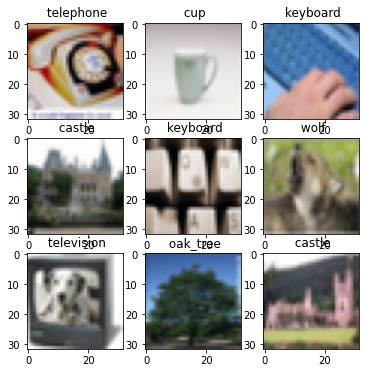

In [ ]:
# get (train) dataset dimensions
data_size, img_rows, img_cols, img_channels = x_train_ds.shape

# set validation set percentage (wrt the training set size)
validation_percentage = 0.15
val_size = round(validation_percentage * data_size)

# Reserve val_size samples for validation and normalize all values
x_val = x_train_ds[-val_size:]/255
y_val = y_train_ds[-val_size:]
x_train = x_train_ds[:-val_size]/255
y_train = y_train_ds[:-val_size]
x_test = x_test_ds/255
y_test = y_test_ds

# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# get class label from class index
def class_label_from_index(fine_category):
  return(CIFAR100_LABELS_LIST[fine_category.item(0)])

# plot first few images
plt.figure(figsize=(6, 6))
for i in range(9):
	# define subplot
  plt.subplot(330 + 1 + i).set_title(class_label_from_index(y_train[i]))
	# plot raw pixel data
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
  #show the figure
plt.show()

## Ερώτημα 1
---
#### Βήμα 1: Σχεδίαση, μεταγλώττιση και εκπαίδευση των μοντέλων

 1. Σχεδίαστε, μεταγλωττίστε και εκπαιδεύστε τα μοντέλα  **LeNet, AlexNet και  VGG**, καθώς και ένα δικό σας μοντέλο (ονομάστε το π.χ. **MyCNN**) χρησιμοποιώντας διαφορετικούς συνδυασμούς (τουλάχιστον 2 ανά μοντέλο) για [optimizer](https://keras.io/api/optimizers/), [loss](https://keras.io/api/losses/), batch size και epoch.  Για [metrics](https://keras.io/api/metrics/) να χρησιμοποιήσετε την ορθότητα (όπως στο Lab8.1).
---
  
#### Βήμα 2: Αξιολόγηση των μοντέλων

1. Για κάθε ένα από τα μοντέλα που εκπαιδεύσατε, απεικονίστε σε κοινό διάγραμμα την ορθότητα εκπαίδευσης και την ορθότητα επικύρωσης στο σύνολο των εποχών, για κάθε διαφορετικό συνδυασμό του βήματος 1 και επιλέξτε αυτό με την καλύτερη ορθότητα από κάθε μοντέλο (ένα από κάθε αρχιτεκτονική, συνολικά 4).
2. Για κάθε ένα από τα μοντέλα με την καλύτερη ορθότητα (συνολικά **4**), απεικονίστε σε κοινό διάγραμμα την ορθότητα εκπαίδευσης και την ορθότητα επικύρωσης στο σύνολο των εποχών.
3. Αξιολογήστε, αναλυτικά, τα αποτελέσματά σας ως προς τα εξής:
 - Επίδραση του πλήθους των δεδομένων/κλάσεων στην απόδοση του μοντέλου
 - Επίδραση του αλγόριθμου βελτιστοποίησης (optimizer)
 - Επίδραση του μεγέθους δέσμης (batch size)
 
---

#### Βήμα 3: Αξιολόγηση ορθότητας
Αξιολογήστε την ορθότητα για το test set σας.



## Ερώτημα 2
---
### Βήμα 1: Έλεγχος υπερεκπαίδευσης

Για τον καλύτερο συνδυασμό που λάβατε από το Ερώτημα 1 για μοντέλο σας  (**MyCNN**) και μόνο, δοκιμάστε διάφορους συνδυασμούς των ακόλουθων τεχνικών για τον έλεγχο της υπερεκπαίδευσης (overfitting), όπως: 
- Πρόωρος τερματισμός (early stopping [tf.keras.callbacks.EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStoppinghttps://)) 

- Dropout ([Dropout](https://www.tensorflow.org/tutorials/images/classification#dropout))

- Επαύξηση δεδομένων ([Data augmentation](https://www.tensorflow.org/tutorials/images/classification#data_augmentation), [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#class_imagedatagenerator)) 

\\
, ώστε το μοντέλο σας να γενικεύει καλύτερα.

---
### Βήμα 2: Αξιολόγηση
Αξιολογήστε της ορθότητας για το validation και το test set σας.

## Ερώτημα 3
---
### Βήμα 1: Μεταφορά γνώσης
Εφαρμόστε μεταφορά γνώσης (transfer learning) στο δικό σας μοντέλο (**MyCNN**), που αξιολογήσατε ως καλύτερο προς την ορθότητα στην αντιμετώπιση της υπερεκπαίδεσης. 

Για το transfer learning, επιλέξτε το [VGG16](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16) για μεταφορά μάθησης.

1. "Παγώστε" τη συνελικτική βάση και εκπαιδεύστε την κεφαλή ταξινόμησης (classification head - σημαία trainable = False).  

2. Εκπαιδέστε μόνο ένα ποσοστό των επιπέδων, το οποίο βρίσκεται προς την έξοδο του δικτύου. Οι σημαίες trainable εδώ θα πρέπει να οριστούν ανά επίπεδο.

3. Αξιολογήστε τα αποτελέσματά σας, βάσει της ορθότητας του validation set και του test set σας.

## Διαχείριση μνήμης (TFRecord)
Η φόρτωση δεδομένων με τον τρόπο που το κάναμε παραπάνω στο απλό παράδειγμα υλοποίησης είναι πολύ βολική αλλά δεν είναι αποτελεσματική ως προς τη διαχείριση της μνήμης. Συγκεκριμένα, με τον τρόπο αυτό, τα δεδομένα αποθηκεύονται απευθείας σε μεταβλητές, οι οποίες όλες μαζί καταλαμβάνουν τη RAM της CPU ή της GPU, κάτι που κάνει αδύνατη τη διαχείριση μεγάλων datasets ή τον μεταχηματισμό των δεδομένων όπως όταν κάνουμε αύξηση δεδομένων (data augmentation).

Για να παρακαμφθεί αυτό το πρόβλημα, υπάρχει η δυνατότητα της σειριοποίησης των δεδομένων (serialization) και της αποθήκευσής τους σε αρχεία μεσαίου μεγέθους (κάποιων MB) τα οποία μπορούν να αναγνωστούν γραμμικά.

Το φορμάτ TFRecord είναι ένα φορμάτ που επιτρέπει την αποθήκευση σειράς δυαδικών εγγραφών. Διαβάστε σχετικά για το [TFRecord and tf.Example](https://www.tensorflow.org/tutorials/load_data/tfrecord) και [tf.data: Build TensorFlow input pipelines](https://www.tensorflow.org/guide/data). 

Σημειώστε ότι με τη μέθοδο αυτή θα πρέπει να γίνει import η `tensorflow_datasets` και να χρησιμοποιήσουμε την `tfds.load` ώστε να αποθηκευθεί το σύνολο δεδομένων σε αρχεία tfrecord στο δίσκο (δείτε [εδώ](https://colab.research.google.com/github/tensorflow/datasets/blob/master/docs/overview.ipynb) ένα παράδειγμα). Φυσικά μπορούμε να μετατρέψουμε και τα πρωτογενή δεδομένα (raw data) του dataset όπως αρχεία jpg σε φορματ tfrecord όπως [εδώ](https://towardsdatascience.com/working-with-tfrecords-and-tf-train-example-36d111b3ff4d).
